In [56]:
# Import modules
import pandas as pd
import numpy as np
import netCDF4
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import FormatStrFormatter
import glob
import pyresample
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pyproj import Transformer
import os
from datetime import timedelta, datetime

In [43]:
# Define path
path = '/Users/jryan4/Dropbox (University of Oregon)/research/clouds/data/'

# Import data
df = pd.read_csv(path + 'cre_spreadsheet.csv')

# Define years
n = np.arange(2003, 2021, 1)

# Import data
cloud = netCDF4.Dataset(path + 'modis_cloud_properties/cloud_fraction_2010.nc')

# Define ice sheet grid
ismip = netCDF4.Dataset(path + 'masks/1km-ISMIP6.nc')
ismip_mask = ismip.variables['ICE'][:]

/var/folders/xj/5ps5mr8d5ysbd2mxxqjg3k800000gq/T/ipykernel_70465/1001151311.py:24: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('white')


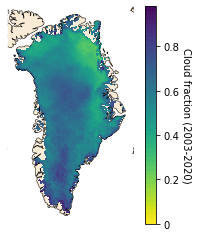

In [161]:
###############################################################################
# Figure SX: Cloud fraction for Greenland Ice Sheet
###############################################################################

lons = cloud.variables['longitude'][:]
lats = cloud.variables['latitude'][:]
cloud_fraction = cloud.variables['cloud_fraction'][:]

# Mask data
cloud_fraction[~ismip_mask.astype(bool)] = np.nan

# Resize for more convenient plotting
cloud_fraction = cloud_fraction[::5,::5]
lons = lons[::5,::5]
lats = lats[::5,::5]

fig = plt.figure(figsize=(4, 4))
v = np.arange(0, 1, 0.02)
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-45))
plt.contourf(lons, lats, cloud_fraction, v, transform=ccrs.PlateCarree(), vmin=0, vmax=1,
             cmap='viridis_r')
ax.coastlines(resolution='50m', color='black', linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='antiquewhite')
ax.outline_patch.set_edgecolor('white')
cbar = plt.colorbar(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
cbar.ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1]) 
cbar.set_label('Cloud fraction', rotation=270, labelpad=12)
#plt.tight_layout()
plt.savefig('/Users/jryan4/Dropbox (University of Oregon)/research/clouds/revised-manuscript/figures/fig_1a_cloud_fraction.png', dpi=200)

In [159]:
print(np.nanpercentile(cloud_fraction, 95))
print(np.nanpercentile(cloud_fraction, 5))
print(np.nanmean(cloud_fraction))

0.7075429439544678
0.3271918922662735
0.5430771


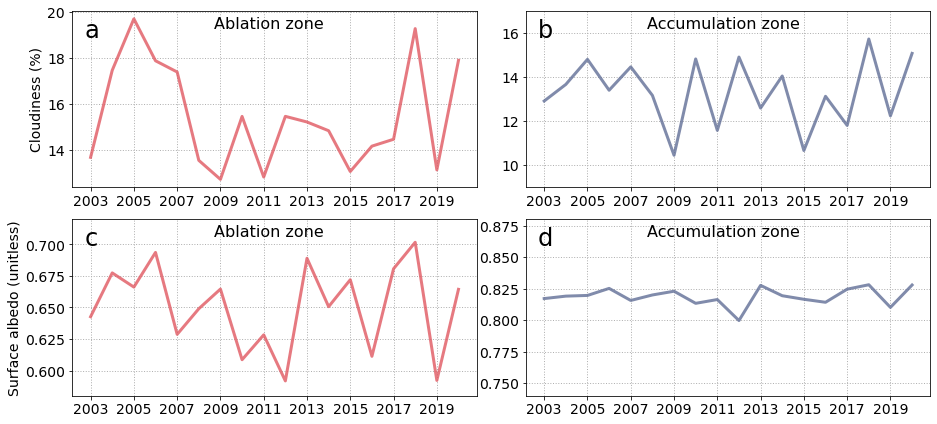

In [36]:
###############################################################################
# Figure SX: Interannual variation in cloudiness and surface albedo in the 
# accumulation and ablation zone.
###############################################################################

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(13, 6))

# Define colour map
c1 = '#E05861'
c2 = '#616E96'
c3 = '#F8A557'
c4 = '#3CBEDD'

# Axis 1
ax1.grid(linestyle='dotted', lw=1, zorder=1)
ax1.plot(n, df['cldy_abl']*100, color=c1, zorder=2, lw=3, alpha=0.8, label='')
#ax1.set_ylim(0, 10.5)
ax1.set_ylabel('Cloudiness (%)', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_xticks(n[::2])
ax1.set_xticklabels(n[::2])

# Axis 2
ax2.grid(linestyle='dotted', lw=1, zorder=1)
ax2.plot(n, df['cldy_acc']*100, color=c2, zorder=2, lw=3, alpha=0.8, label='')
#ax2.set_ylim(0, 10.5)
ax2.set_ylabel('', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_xticks(n[::2])
ax2.set_xticklabels(n[::2])
ax2.set_ylim(9, 17)

# Axis 3
ax3.grid(linestyle='dotted', lw=1, zorder=1)
ax3.plot(n, df['alb_abl'], color=c1, zorder=2, lw=3, alpha=0.8, label='')
ax3.set_ylim(0.58, 0.72)
ax3.set_ylabel('Surface albedo (unitless)', fontsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)
ax3.set_xticks(n[::2])
ax3.set_xticklabels(n[::2])

# Axis 4
ax4.grid(linestyle='dotted', lw=1, zorder=1)
ax4.plot(n, df['alb_acc'], color=c2, zorder=2, lw=3, alpha=0.8, label='')
#ax4.set_ylim(0, 10.5)
ax4.set_ylabel('', fontsize=14)
ax4.tick_params(axis='both', which='major', labelsize=14)
ax4.set_xticks(n[::2])
ax4.set_xticklabels(n[::2])
ax4.set_ylim(0.74, 0.88)

ax1.text(0.03, 0.85, "a", fontsize=24, transform=ax1.transAxes)
ax2.text(0.03, 0.85, "b", fontsize=24, transform=ax2.transAxes)
ax3.text(0.03, 0.85, "c", fontsize=24, transform=ax3.transAxes)
ax4.text(0.03, 0.85, "d", fontsize=24, transform=ax4.transAxes)

ax1.text(0.35, 0.90, "Ablation zone", fontsize=16, transform=ax1.transAxes)
ax2.text(0.3, 0.90, "Accumulation zone", fontsize=16, transform=ax2.transAxes)
ax3.text(0.35, 0.90, "Ablation zone", fontsize=16, transform=ax3.transAxes)
ax4.text(0.3, 0.90, "Accumulation zone", fontsize=16, transform=ax4.transAxes)

fig.tight_layout()
fig.savefig('/Users/jryan4/Dropbox (University of Oregon)/research/clouds/revised-manuscript/supp_figures/fig_sx_cloudiness_albedo.pdf')

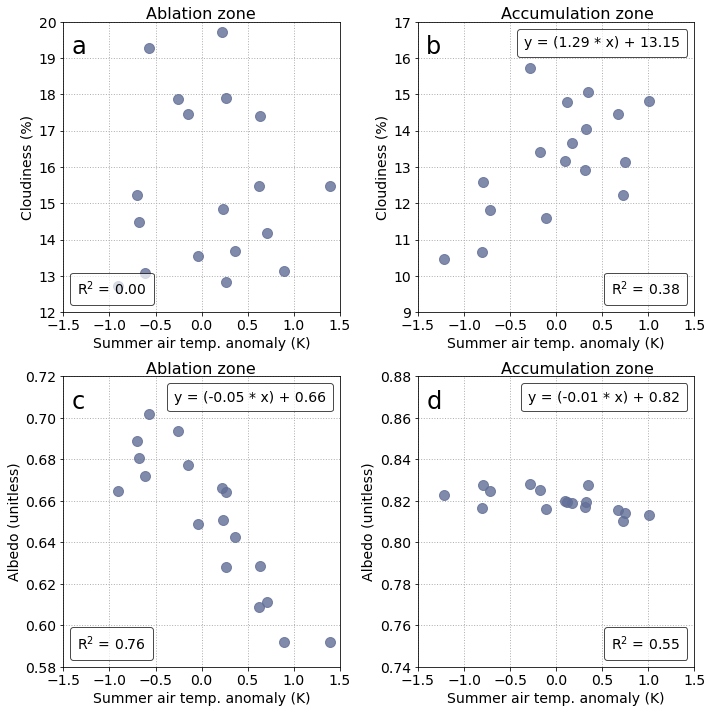

In [40]:
###############################################################################
# Figure SX: (a) MODIS albedo vs. ERA5 air temperature in the ablation zone and,
# (b) MODIS albedo vs. ERA5 air temperature in the accumulation zone
############################################################################### 
era = netCDF4.Dataset(path + 'era/era_summer_climatologies.nc')

# Define maximum snowline
snowline_file = netCDF4.Dataset(path + 'sci-adv-products/Monthly_Bare_Ice_2012.nc')
snowline = snowline_file.variables['bare_ice'][1, :, :].filled(np.nan)
max_snowline = (snowline > 0.1)
mask = snowline_file.variables['mask'][:].astype('bool')

era_t = era.variables['t2m'][:]
era_t_abl = []
era_t_acc = []
for i in range(18):
    era_t_abl.append(np.nanmean(era_t[:,:,i][max_snowline]))
    era_t_acc.append(np.nanmean(era_t[:,:,i][(~max_snowline & mask)]))
    
baseline_abl = np.mean(era_t_abl[12:])
baseline_acc = np.mean(era_t_acc[12:])

slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(era_t_abl - baseline_abl, df['cldy_abl']*100)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(era_t_acc - baseline_acc, df['cldy_acc']*100)
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(era_t_abl - baseline_abl, df['alb_abl'])
slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(era_t_acc - baseline_acc, df['alb_acc'])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Define colour map
c1 = '#E05861'
c2 = '#616E96'
c3 = '#F8A557'
c4 = '#3CBEDD'

ax1.grid(linestyle='dotted', lw=1, zorder=1)
ax1.scatter(era_t_abl - baseline_abl, df['cldy_abl']*100, color=c2, zorder=2, s=100, alpha=0.8)
ax2.grid(linestyle='dotted', lw=1, zorder=1)
ax2.scatter(era_t_acc - baseline_acc, df['cldy_acc']*100, color=c2, zorder=2, s=100, alpha=0.8)
ax3.grid(linestyle='dotted', lw=1, zorder=1)
ax3.scatter(era_t_abl - baseline_abl, df['alb_abl'], color=c2, zorder=2, s=100, alpha=0.8)
ax4.grid(linestyle='dotted', lw=1, zorder=1)
ax4.scatter(era_t_acc - baseline_acc, df['alb_acc'], color=c2, zorder=2, s=100, alpha=0.8)

ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(12, 20)
ax2.set_xlim(-1.5, 1.5)
ax2.set_ylim(9, 17)
ax3.set_xlim(-1.5, 1.5)
ax3.set_ylim(0.58, 0.72)
ax4.set_xlim(-1.5, 1.5)
ax4.set_ylim(0.74, 0.88)

# Add stats
textstr = '\n'.join((
    r'R$^{2}$ = %.2f' % (r_value1**2, ),))
text_box = AnchoredText(textstr, frameon=True, loc=3, pad=0.5, prop=dict(size=14))
text_box.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
plt.setp(text_box.patch, facecolor='white', alpha=0.7)
ax1.add_artist(text_box)

# Add stats
textstr = '\n'.join((
    r'R$^{2}$ = %.2f' % (r_value2**2, ),))
text_box = AnchoredText(textstr, frameon=True, loc=4, pad=0.5, prop=dict(size=14))
text_box.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
plt.setp(text_box.patch, facecolor='white', alpha=0.7)
ax2.add_artist(text_box)

# Add stats
textstr = '\n'.join((
    r'y = (%.2f * x) + %.2f' % (slope2, intercept2),))
text_box = AnchoredText(textstr, frameon=True, loc=1, pad=0.5, prop=dict(size=14))
text_box.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
plt.setp(text_box.patch, facecolor='white', alpha=0.7)
ax2.add_artist(text_box)

# Add stats
textstr = '\n'.join((
    r'R$^{2}$ = %.2f' % (r_value3**2, ),))
text_box = AnchoredText(textstr, frameon=True, loc=3, pad=0.5, prop=dict(size=14))
text_box.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
plt.setp(text_box.patch, facecolor='white', alpha=0.7)
ax3.add_artist(text_box)

# Add stats
textstr = '\n'.join((
    r'y = (%.2f * x) + %.2f' % (slope3, intercept3),))
text_box = AnchoredText(textstr, frameon=True, loc=1, pad=0.5, prop=dict(size=14))
text_box.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
plt.setp(text_box.patch, facecolor='white', alpha=0.7)
ax3.add_artist(text_box)

# Add stats
textstr = '\n'.join((
    r'R$^{2}$ = %.2f' % (r_value4**2, ),))
text_box = AnchoredText(textstr, frameon=True, loc=4, pad=0.5, prop=dict(size=14))
text_box.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
plt.setp(text_box.patch, facecolor='white', alpha=0.7)
ax4.add_artist(text_box)

# Add stats
textstr = '\n'.join((
    r'y = (%.2f * x) + %.2f' % (slope4, intercept4),))
text_box = AnchoredText(textstr, frameon=True, loc=1, pad=0.5, prop=dict(size=14))
text_box.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
plt.setp(text_box.patch, facecolor='white', alpha=0.7)
ax4.add_artist(text_box)

ax1.set_xlabel('Summer air temp. anomaly (K)', fontsize=14)
ax1.set_ylabel('Cloudiness (%)', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.set_xlabel('Summer air temp. anomaly (K)', fontsize=14)
ax2.set_ylabel('Cloudiness (%)', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax3.set_xlabel('Summer air temp. anomaly (K)', fontsize=14)
ax3.set_ylabel('Albedo (unitless)', fontsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)
ax4.set_xlabel('Summer air temp. anomaly (K)', fontsize=14)
ax4.set_ylabel('Albedo (unitless)', fontsize=14)
ax4.tick_params(axis='both', which='major', labelsize=14)
ax4.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax1.text(0.3, 1.01, "Ablation zone", fontsize=16, transform=ax1.transAxes)
ax2.text(0.3, 1.01, "Accumulation zone", fontsize=16, transform=ax2.transAxes)
ax3.text(0.3, 1.01, "Ablation zone", fontsize=16, transform=ax3.transAxes)
ax4.text(0.3, 1.01, "Accumulation zone", fontsize=16, transform=ax4.transAxes)

ax1.text(0.03, 0.89, "a", fontsize=24, transform=ax1.transAxes)
ax2.text(0.03, 0.89, "b", fontsize=24, transform=ax2.transAxes)
ax3.text(0.03, 0.89, "c", fontsize=24, transform=ax3.transAxes)
ax4.text(0.03, 0.89, "d", fontsize=24, transform=ax4.transAxes)

fig.tight_layout()
fig.savefig('/Users/jryan4/Dropbox (University of Oregon)/research/clouds/revised-manuscript/supp_figures/fig_sx_t_vs_albedo.pdf')

In [12]:
def data_read_machine_learning(files):
    
    # Combine data   
    cloud_type = []
    cloud_phase = []
    sza_cloudsat = []
    region = []
    elev = []
    sw_down_cs = []
    sw_down_as = []
    lw_down_cs = []
    lw_down_as = []
    
    modis_cot = []
    modis_ctp = []
    modis_phase = []
    modis_cer = []
    modis_ctt = []
    modis_cth = []
    modis_cwp = []
    
    modis_albedo = []
    cloudsat_albedo = []
    t2m = []
    d2m = []
    ssrdc = []
    strdc = []
    
    lat = []
    lon = []
    
    for i in files:
        
        # Read data
        df = pd.read_csv(i)
        
        # Get path and filename separately
        infilepath1, infilename1 = os.path.split(i)
        # Get file name without extension
        infileshortname1, extension1 = os.path.splitext(infilename1)
        
        # Append
        lat.append(df['lat'].values)
        lon.append(df['lon'].values)
        sza_cloudsat.append(df['sza_cloudsat'].values)
        cloud_type.append(df['cloud_type'].values)
        region.append(df['region'].values)
        elev.append(df['elev'].values)
        sw_down_as.append(df['sw_down_as'].values)
        sw_down_cs.append(df['sw_down_cs'].values)
        lw_down_as.append(df['lw_down_as'].values)
        lw_down_cs.append(df['lw_down_cs'].values)
        cloud_phase.append(df['cloud_phase_cloudsat'].values)
        modis_cot.append(df['cloud_optical_thickness'].values)
        modis_ctp.append(df['cloud_top_pressure'].values)
        modis_phase.append(df['cloud_phase_modis'].values)
        modis_cer.append(df['cloud_effective_radius'].values)
        modis_ctt.append(df['cloud_top_temperature'].values)
        modis_cth.append(df['cloud_top_height'].values)
        modis_cwp.append(df['cloud_water_path'].values)
        modis_albedo.append(df['albedo_modis'].values)
        cloudsat_albedo.append(df['albedo_cloudsat'].values)
        t2m.append(df['t2m'].values)
        d2m.append(df['d2m'].values)
        ssrdc.append(df['ssrdc'].values)
        strdc.append(df['strdc'].values)
        
    lat_flat = [item for sublist in lat for item in sublist]
    lon_flat = [item for sublist in lon for item in sublist]
    cloud_type_flat = [item for sublist in cloud_type for item in sublist]
    cloud_phase_flat = [item for sublist in cloud_phase for item in sublist]
    sza_flat = [item for sublist in sza_cloudsat for item in sublist]
    region_flat = [item for sublist in region for item in sublist]
    elev_flat = [item for sublist in elev for item in sublist]
    sw_down_cs_flat = [item for sublist in sw_down_cs for item in sublist]
    sw_down_as_flat = [item for sublist in sw_down_as for item in sublist]
    lw_down_cs_flat = [item for sublist in lw_down_cs for item in sublist]
    lw_down_as_flat = [item for sublist in lw_down_as for item in sublist]
    
    modis_cot_flat = [item for sublist in modis_cot for item in sublist]
    modis_ctp_flat = [item for sublist in modis_ctp for item in sublist]
    modis_phase_flat = [item for sublist in modis_phase for item in sublist]
    modis_cer_flat = [item for sublist in modis_cer for item in sublist]
    modis_ctt_flat = [item for sublist in modis_ctt for item in sublist]
    modis_cth_flat = [item for sublist in modis_cth for item in sublist]
    modis_cwp_flat = [item for sublist in modis_cwp for item in sublist]
    
    modis_albedo_flat = [item for sublist in modis_albedo for item in sublist]
    cloudsat_albedo_flat = [item for sublist in cloudsat_albedo for item in sublist]
    t2m_flat = [item for sublist in t2m for item in sublist]
    d2m_flat = [item for sublist in d2m for item in sublist]
    ssrdc_flat = [item for sublist in ssrdc for item in sublist]
    strdc_flat = [item for sublist in strdc for item in sublist]

    # Put into DataFrame
    df = pd.DataFrame(list(zip(lon_flat, lat_flat, sza_flat,cloud_type_flat,
                               cloud_phase_flat,region_flat,
                               elev_flat, sw_down_cs_flat,sw_down_as_flat, 
                               lw_down_cs_flat,lw_down_as_flat,modis_cot_flat,
                               modis_ctp_flat,modis_phase_flat,modis_cer_flat,
                               modis_ctt_flat,modis_cth_flat, modis_cwp_flat,
                               modis_albedo_flat,cloudsat_albedo_flat, t2m_flat,
                               d2m_flat, ssrdc_flat, strdc_flat)))
    
    df.columns = ['lon', 'lat', 'sza', 'type', 'phase', 'region', 'elev','sw_cs', 'sw_as',
                  'lw_cs', 'lw_as','modis_cot', 'modis_ctp', 'modis_phase',
                  'modis_cer', 'modis_ctt', 'modis_cth', 'modis_cwp', 
                  'modis_albedo','cloudsat_albedo', 't2m', 'd2m', 'ssrdc', 'strdc']
    
    # Remove rows with no data
    df = df.dropna()
    
    # Remove rows with spurious longwave data
    df = df[df['lw_as'] < 400]
    df = df[df['lw_as'] > 150]
    df = df[df['lw_cs'] != 0]
    df = df[df['lw_cs'] > 150]
    
    # Remove rows with spurious shortwave data
    df = df[df['sw_as'] != 0]
    df = df[df['sw_cs'] != 0]
    
    # Remove if cloud detected but no effect on radiative fluxes
    clearsky = df[df['type'] == 0]
    valid = df[(df['lw_cs'] != df['lw_as']) | (df['sw_cs'] != df['sw_as'])]
    df = pd.concat((clearsky, valid))
    
    # Add factor column
    df['f_sw'] = np.divide(df['sw_as'], df['sw_cs'])
    df['f_lw'] = np.divide(df['lw_as'], df['lw_cs'])

    return df

In [16]:
# Define path 
path = '/Users/jryan4/Dropbox (University of Oregon)/research/clouds/data/merged_data/'

# Define CloudSat
files = glob.glob(path + '*')

# Read data
data = data_read_machine_learning(files)

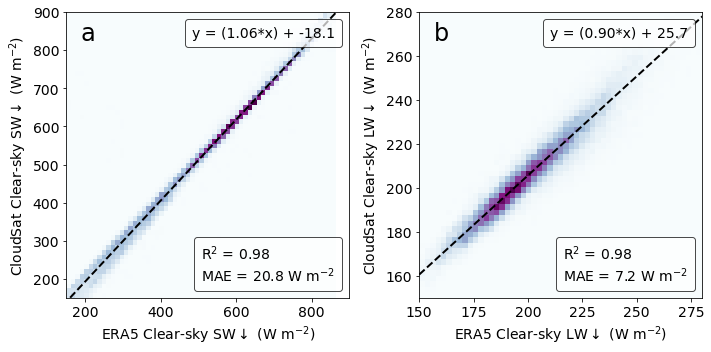

In [23]:
###############################################################################
# Figure SX: Relationships used for computing downward shortwave and longwave clear-sky radiation.
###############################################################################

slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(data['ssrdc']/3600, data['sw_cs'])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(data['strdc']/3600, data['lw_cs'])

mae1 = np.mean(np.abs(data['sw_cs'] - data['ssrdc']/3600))
mae2 = np.mean(np.abs(data['lw_cs'] - data['strdc']/3600))

# Generate points for linear relationship
x_sw = np.arange(data['ssrdc'].min()/3600, data['ssrdc'].max()/3600, 1)
y_sw = (slope1*x_sw) + intercept1

x_lw = np.arange(data['strdc'].min()/3600, data['strdc'].max()/3600, 1)
y_lw = (slope2*x_lw) + intercept2

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Define colour map
c1 = '#E05861'
c2 = '#616E96'
c3 = '#F8A557'
c4 = '#3CBEDD'

ax1.hist2d(data['ssrdc']/3600, data['sw_cs'], bins=(70, 70), cmap=plt.cm.BuPu)
ax1.plot(x_sw, y_sw, color='k', lw=2, ls='dashed')
ax2.hist2d(data['strdc']/3600, data['lw_cs'], bins=(70, 70), cmap=plt.cm.BuPu)
ax2.plot(x_lw, y_lw, color='k', lw=2, ls='dashed')

ax1.set_xlim(150, 900)
ax1.set_ylim(150, 900)
ax2.set_xlim(150, 280)
ax2.set_ylim(150, 280)

# Add stats
textstr = '\n'.join((
    r'R$^{2}$ = %.2f' % (r_value1**2, ),
    r'MAE = %.1f W m$^{-2}$' % (mae1, )))
text_box = AnchoredText(textstr, frameon=True, loc=4, pad=0.5, prop=dict(size=14))
text_box.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
plt.setp(text_box.patch, facecolor='white', alpha=0.7)
ax1.add_artist(text_box)

textstr = r'y = (%.2f*x) + %.1f' % (slope1, intercept1, )
text_box = AnchoredText(textstr, frameon=True, loc=1, pad=0.5, prop=dict(size=14))
text_box.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
plt.setp(text_box.patch, facecolor='white', alpha=0.7)
ax1.add_artist(text_box)

textstr = '\n'.join((
    r'R$^{2}$ = %.2f' % (r_value1**2, ),
    r'MAE = %.1f W m$^{-2}$' % (mae2, )))
text_box = AnchoredText(textstr, frameon=True, loc=4, pad=0.5, prop=dict(size=14))
text_box.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
plt.setp(text_box.patch, facecolor='white', alpha=0.7)
ax2.add_artist(text_box)

textstr = r'y = (%.2f*x) + %.1f' % (slope2, intercept2, )
text_box = AnchoredText(textstr, frameon=True, loc=1, pad=0.5, prop=dict(size=14))
text_box.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
plt.setp(text_box.patch, facecolor='white', alpha=0.7)
ax2.add_artist(text_box)

ax1.set_ylabel('CloudSat Clear-sky SW$\downarrow$ (W m$^{-2}$)', fontsize=14)
ax1.set_xlabel('ERA5 Clear-sky SW$\downarrow$ (W m$^{-2}$)', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2.set_ylabel('CloudSat Clear-sky LW$\downarrow$ (W m$^{-2}$)', fontsize=14)
ax2.set_xlabel('ERA5 Clear-sky LW$\downarrow$ (W m$^{-2}$)', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

ax1.text(0.05, 0.90, "a", fontsize=24, transform=ax1.transAxes)
ax2.text(0.05, 0.90, "b", fontsize=24, transform=ax2.transAxes)

fig.tight_layout()
fig.savefig('/Users/jryan4/Dropbox (University of Oregon)/research/clouds/revised-manuscript/supp_figures/fig_sx_clearsky_evaluation.png', dpi=200)

In [138]:
###############################################################################
# Figure SX: Relationship between hourly and daily ERA downward LW
###############################################################################

# Import data
era = netCDF4.Dataset(path + 'era/era_strd_2010.nc')
lw_hourly = era.variables['strd'][:]

points_x = np.repeat(60, 200)
points_y = np.arange(0, 200, 1)         

daily = []
hourly = []
for point in range(len(points_x)):
    
    # Get time
    base = datetime(1900,1,1)
    era_df = pd.DataFrame(list(zip(era.variables['time'][:], list(era.variables['strd'][:, points_x[point], points_y[point]] / 3600))), 
                          columns=['hour', 'strd'])
    era_df['datetime'] = era_df['hour'].apply(lambda x: base + timedelta(hours=x))
    era_df = era_df.set_index('datetime')
    
    # Get daily mean
    era_daily = era_df['strd'].resample('d').mean()
    
    # Convert back to hourly
    era_hourly = era_daily.resample('H').interpolate()
    
    # Merge
    merge = pd.merge(era_df, era_hourly, how='inner', left_index=True, right_index=True)
    
    # Append
    daily.append(list(merge['strd_y'].values))
    hourly.append(list(merge['strd_x'].values))

daily_flat = [item for sublist in daily for item in sublist]
hourly_flat = [item for sublist in hourly for item in sublist]

In [139]:
slope, intercept, r_value, p_value, std_err = stats.linregress(hourly_flat, daily_flat)
mae = np.mean(np.abs(merge['strd_x'] - merge['strd_y']))

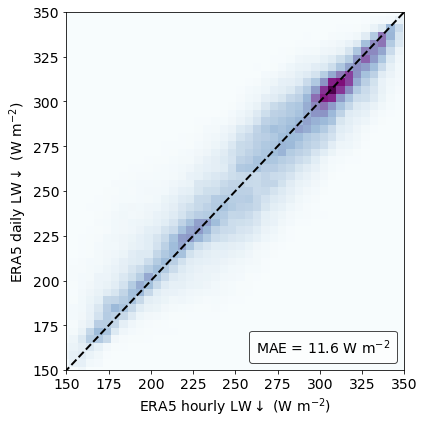

In [150]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax1.hist2d(hourly_flat, daily_flat, bins=(50, 50), cmap=plt.cm.BuPu)
ax1.plot([140, 400], [140, 400], c='k', lw=2, ls='dashed')

ax1.set_xlim(150, 350)
ax1.set_ylim(150, 350)

# Add stats
textstr = r'MAE = %.1f W m$^{-2}$' % (mae, )
text_box = AnchoredText(textstr, frameon=True, loc=4, pad=0.5, prop=dict(size=14))
text_box.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
plt.setp(text_box.patch, facecolor='white', alpha=0.7)
ax1.add_artist(text_box)

ax1.set_ylabel('ERA5 daily LW$\downarrow$ (W m$^{-2}$)', fontsize=14)
ax1.set_xlabel('ERA5 hourly LW$\downarrow$ (W m$^{-2}$)', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()
fig.savefig('/Users/jryan4/Dropbox (University of Oregon)/research/clouds/revised-manuscript/supp_figures/fig_sx_lw_hourly_vs_daily.pdf')


